In [1]:
# from MLModels import LinearRegression, LogisticRegression, UnivariantLinearRegression, LDA, PCA, KNN, BayesClassifier
from NeuralNetworks import *
import pandas as pd
# import numpy as np
# nnfs.init()
from CNN import *
import matplotlib.pyplot as plt

# Linear Regression

In [2]:
reg = LinearRegression()

x = np.array([[1,2,3],[0,1,1],[1,1,0],[1,0,1]]) # Dummy X_train
y = np.array([2.4,5.6,2.3,2.7]) # Dummy Y_train

model = LinearRegression()
model.fit(x,y)
print('Loss: ',model.loss) # Loss after final iteration

print("Y_hat: ",model.predict(np.array([1,2,3]))) # Dummy X_test

Loss:  3.6251979825350213
Y_hat:  4.109356342638097


# Logistic Regression

Specifically, the KL divergence measures a very similar quantity to cross-entropy. It measures the average number of extra bits required to represent a message with Q instead of P, not the total number of bits.

If two probability distributions are the same, then the cross-entropy between them will be the entropy of the distribution.

[All about Cross Entropy, Entropy, Kl-Divergence, Log Loss](https://machinelearningmastery.com/cross-entropy-for-machine-learning/)

**Log loss = negative log-likelihood (under a Bernoulli probability distribution)**

`Cross_Entropy(Y,Y_hat) = Log_Loss(Y,Y_hat) = Entropy(Y) + KL_Divergence(Y,Y_hat)`

`Cross_Entropy(Y,Y_hat) != Cross_Entropy(Y_hat,Y)`

In [3]:
cla = LogisticRegression()
y = np.array([1,0,0,1])
cla.fit(x,y)

print(cla.loss)

prob, cla = cla.predict(np.array([1,2,3]))
print(cla)

1.0852763569399853
1


# PCA

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.decomposition import PCA as PCA_sk

iris = datasets.load_iris()
X = iris.data  # we only take the first two features.
X = StandardScaler().fit_transform(X)

pca = PCA(4)
pca.fit(X,transform=True)[:3]

array([[-2.26470281, -0.4800266 , -0.12770602,  0.0241682 ],
       [-2.08096115,  0.67413356, -0.23460885,  0.10300677],
       [-2.36422905,  0.34190802,  0.04420148,  0.02837705]])

In [5]:
pca_sk = PCA_sk(4,random_state=13)
pca_sk.fit_transform(X)[:3]

array([[-2.26470281,  0.4800266 , -0.12770602, -0.0241682 ],
       [-2.08096115, -0.67413356, -0.23460885, -0.10300677],
       [-2.36422905, -0.34190802,  0.04420148, -0.02837705]])

In [6]:
x_test = np.array([[-0.4,1.6,-0.3,1.3]])
pca.transform(x_test)

array([[-0.07919271, -1.40598311,  1.46075404,  0.61898115]])

In [7]:
pca_sk.transform(x_test)

array([[-0.07919271,  1.40598311,  1.46075404, -0.61898115]])

# KNN

In [3]:
knn = KNN(k=3)
x = np.array([[1,2,3],[3,4,5],[0,1,0]]) # Dummy X features
y = np.array([0,1,0])
x_test = np.array([[2,3,4]])

knn.fit(x,y)
knn.predict(x_test)

array([0])

# Bayes Classifier

In [7]:
y = np.array([0,1,2,0,0,1,2,3])
X = np.random.rand(8,10)
bayes = BayesClassifier()
bayes.fit(X,y)
bayes.predict(X)

[0, 1, 2, 1, 0, 1, 2, 3]

In [15]:
y = [1,1,1,1,0,2,2,2,2,2,0,0]
np.bincount(y)/len(y)

array([0.25      , 0.33333333, 0.41666667])

# NN

In [36]:
X, y = spiral_data(samples = 100 , classes = 3)
dense1  = Dense(2, 3 )
activation1 = ReLu()
dense2 = Dense(3 , 3 )
activation2 = Softmax()
loss_function = CategoricalCrossEntropy() 
dense1.forward(X)
activation1.forward(dense1.output)
dense2.forward(activation1.output)
activation2.forward(dense2.output)
print(activation2.output[:5])
loss = loss_function.average_loss(activation2.output, y)
print('loss:', loss)

[[0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]
 [0.33333337 0.33333325 0.33333337]
 [0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]]
loss: 1.0986105


# ---------------------------------------------------------------

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


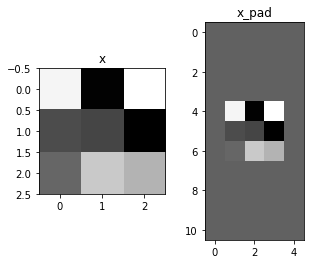

In [4]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)
x = np.random.randn(4, 3, 3, 3)
x_pad = add_padding(x,(4,1),0)


fig, axarr = plt.subplots(1, 2)
axarr[0].set_title('x')
axarr[0].imshow(x[0,:,:,0])
axarr[1].set_title('x_pad')
axarr[1].imshow(x_pad[0,:,:,0])



In [50]:
'''
Whole UNet is divided in 3 parts: Endoder -> BottleNeck -> Decoder. There are skip connections between 'Nth' level of Encoder with Nth level of Decoder.

There is 1 basic entity called "Convolution" Block which has 3*3 Convolution (or Transposed Convolution during Upsampling) -> ReLu -> BatchNorm
Then there is Maxpooling
'''

import torch
import torch.nn as nn

class ConvolutionBlock(nn.Module):
    '''
    The basic Convolution Block Which Will have Convolution -> RelU -> Convolution -> RelU
    '''
    def __init__(self, input_features, out_features):
        '''
        args:
            batch_norm was introduced after UNET so they did not know if it existed. Might be useful
        '''
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(input_features, out_features, kernel_size = 3, padding= 0), # padding is 0 by default, 1 means the input width, height == out width, height
            nn.ReLU(),
            nn.Conv2d(out_features, out_features, kernel_size = 3, padding = 0),
            nn.ReLU(),
            )

    def forward(self, feature_map_x):
        '''
        feature_map_x could be the image itself or the
        '''
        return self.network(feature_map_x)


class Encoder(nn.Module):
    '''
    '''
    def __init__(self, image_channels:int = 3, blockwise_features = [64, 128, 256, 512]):
        '''
        In UNET, the features start at 64 and keeps getting twice the size of the previous one till it reached BottleNeck
        args:
            image_channels: Channels in the Input Image. Typically it is any of the 1 or 3 (rarely 4)
            blockwise_features = Each block has it's own input and output features. it means first ConV block will output 64 features, second 128 and so on
        '''
        super().__init__()
        repeat = len(blockwise_features) # how many layers we need to add len of blockwise_features == len of out_features

        self.layers = nn.ModuleList()
        
        for i in range(repeat):
            if i == 0:
                in_filters = image_channels
                out_filters = blockwise_features[0]
            else:
                in_filters = blockwise_features[i-1]
                out_filters = blockwise_features[i]
            
            self.layers.append(ConvolutionBlock(in_filters, out_filters))

        self.maxpool = nn.MaxPool2d(kernel_size = 2, stride = 2)  # Since There is No gradient for Maxpooling, You can instantiate a single layer for the whole operation
        # https://datascience.stackexchange.com/questions/11699/backprop-through-max-pooling-layers
        
    
    def forward(self, feature_map_x):
        skip_connections = [] # i_th level of features from Encoder will be conatenated with i_th level of decoder before applying CNN
        
        for layer in self.layers:
            feature_map_x = layer(feature_map_x)
            skip_connections.append(feature_map_x)
            feature_map_x = self.maxpool(feature_map_x) # Use Max Pooling AFTER storing the Skip connections

        return feature_map_x, skip_connections

    
class BottleNeck(nn.Module):
    '''
    ConvolutionBlock without Max Pooling
    '''
    def __init__(self, input_features = 512, output_features = 1024):
        super().__init__()
        self.layer = ConvolutionBlock(input_features, output_features)

        
    def forward(self, feature_map_x):
        return self.layer(feature_map_x)
        

class Decoder(nn.Module):
    '''
    '''
    def __init__(self, blockwise_features = [512, 256, 128, 64]):
        '''
        Do exactly opposite of Encoder
        '''
        super().__init__()

        self.upsample_layers = nn.ModuleList()
        self.conv_layers = nn.ModuleList()
        
        for i, feature in enumerate(blockwise_features):

            self.upsample_layers.append(nn.ConvTranspose2d(in_channels = feature*2, out_channels = feature, kernel_size = 2, stride = 2))  # Takes in 1024-> 512, takes 512->254 ......

            self.conv_layers.append(ConvolutionBlock(input_features=feature*2, out_features= feature)) # After Concatinating (512 + 512-> 1024), Use double Conv block
        
    
    def forward(self, feature_map_x, skip_connections):
        '''
        Steps go as:
        1. Upsample
        2. Concat Skip Connection
        3. Apply ConvolutionBlock
        '''

        for i, layer in enumerate(self.conv_layers): # 4 levels, 4 skip connections, 4 upsampling, 4 Double Conv Block
            skip_feature = skip_connections[-i-1]
            feature_map_x = self.upsample_layers[i](feature_map_x) # step 1

            if skip_feature.shape[-1] != feature_map_x.shape[-1]: # The part of COPY CROP to make the dimensions equal
                pad = (skip_feature.shape[-1] - feature_map_x.shape[-1]) // 2 # Half padding on each side, 
                feature_map_x = nn.functional.pad(feature_map_x, pad = [pad,pad], )


            feature_map_x = torch.cat((skip_feature, feature_map_x), dim = 1) # step 2, Concatinating along Channels or Features dimensions given [N,C,W,H]
            feature_map_x = self.conv_layers[i](feature_map_x)

        return feature_map_x



In [51]:
image = torch.randn(1,3, 572,572)
enc = Encoder(3, )
feat, skip = enc(image)
bot = BottleNeck()
feat = bot(feat)

dec = Decoder()
feats = dec(feat, skip)

# feat = nn.ConvTranspose2d(1024, 512,2,2)(feat)
# pad = (skip[-1].shape[-1] - feat.shape[-1]) // 2
# feat = nn.functional.pad(feat, [pad,pad,pad, pad])
# feat = torch.cat([skip[-1],feat],dim=1)

RuntimeError: Sizes of tensors must match except in dimension 1. Got 64 and 56 in dimension 2 (The offending index is 1)

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50

In [11]:
def DilatedConvolutionBlock(input_features, kernel_size = 3, dilation_rate = 1, filters = 256, padding = 'same', use_bias = False):
    '''
    Takes in some features and perform the folloring operations: Dilated (Atrous) Contolution -> BatchNorm -> ReLu
    To read more about "SAME" Padding: read https://stackoverflow.com/questions/68035443/what-does-padding-same-exactly-mean-in-tensorflow-conv2d-is-it-minimum-paddin
    '''
    x = Convolution2D(filters, kernel_size, dilation_rate = dilation_rate, use_bias = use_bias, padding = padding)(input_features)
    x = BatchNormalization()(x)
    return ReLU()(x) # tf.nn.relu(x)


def Perform_ASPP(input_features):
    '''
    Get features From Backbone and Create Atrous Spatial Pyramid Pooling. 
    The features are first bilinearly upsampled by a factor 4, and then concatenated with the corresponding low-level features from the network backbone that have the same spatial resolution.

    Pay attention to the "ENCODER" part here: https://miro.medium.com/max/1037/1*2mYfKnsX1IqCCSItxpXSGA.png In this image, DCNN is any pre-trained architecture features
    '''
    width, height = input_features.shape[1], input_features.shape[2] # given Channels Last format

    one_cross_one = DilatedConvolutionBlock(input_features = input_features, kernel_size = 1, dilation_rate = 1,)
    rate_6 = DilatedConvolutionBlock(input_features = input_features, dilation_rate = 6,) # (default) 3x3 convolution with dilation rate of 6
    rate_12 = DilatedConvolutionBlock(input_features = input_features, dilation_rate = 12,)
    rate_18 = DilatedConvolutionBlock(input_features = input_features, dilation_rate = 18,)

    pooling_part = AveragePooling2D(pool_size = (width, height))(input_features)
    pooling_part = DilatedConvolutionBlock(pooling_part, kernel_size = 1, use_bias = True)
    pooling_part = UpSampling2D(size=(width, height), interpolation="bilinear")(pooling_part)
    # We could use Transposed Convolution for this, for difference, see: https://stackoverflow.com/questions/53654310/what-is-the-difference-between-upsampling2d-and-conv2dtranspose-functions-in-ker

    concatenated_fetures = Concatenate(axis = -1)([pooling_part, one_cross_one, rate_6, rate_12, rate_18]) # Concatenate all features
    return DilatedConvolutionBlock(concatenated_fetures, kernel_size = 1, )
    

def EncoderPart(backbone, right_layer_name, down_layer_name):
    '''
    The dotted ENCODER part in the image: https://miro.medium.com/max/1037/1*2mYfKnsX1IqCCSItxpXSGA.png
    Takes an input as Image and generates two outputs:
    1. Features extracted from down_layer_name is directly sent to the Decoder (where 1x1 convolution will be performed later)
    2. Right Path: Feature which are computed from the ASPP

    args:
        backbone: Pre Trained Model
        right_layer_name: Layer name whose output will be used for ASPP. You can try with different layers and their outputs
        down_layer_name: Layer name whose output will be sent directly to the Decoder
    '''
    features = backbone.get_layer(right_layer_name).output # this is the layer whose output they have used as Features extraction. You could also use: backbone.layers[142].output
    right_path = Perform_ASPP(features)
    return backbone.get_layer(down_layer_name).output, right_path


def DecoderPart(down_path_features, right_path_features, image_shape):
    '''
    The dotted DECODER part in the image: https://miro.medium.com/max/1037/1*2mYfKnsX1IqCCSItxpXSGA.png
    Takes two inputs (down_path_features, right_path_features: See the DocString of Encoder to see what they are) and return an output
    '''
    first_upsampling_by_4 = UpSampling2D(size = (4, 4), interpolation = 'bilinear')(right_path_features)

    one_cross_one = DilatedConvolutionBlock(down_path_features, kernel_size = 1, dilation_rate = 1, filters = 48)

    concat = Concatenate(axis = -1)([first_upsampling_by_4, one_cross_one])

    x = DilatedConvolutionBlock(concat, kernel_size = 3, dilation_rate = 1) # default parameters are used
    x = DilatedConvolutionBlock(x, kernel_size = 3, dilation_rate = 1)

    second_upsampling_by_4 = UpSampling2D(size = (4,4), interpolation = 'bilinear')(x)
    return second_upsampling_by_4


def DeepLabV3Plus(num_classes, backbone = ResNet50, image_shape = (512,512,3), right_layer_name = "conv4_block6_2_relu", down_layer_name = "conv2_block3_2_relu"):
    '''
    Build DeepLabV3+ Architecture Model. Following Steps are Done:
    1. Fetch a pre trained Model and instantiate it
    2. Extract 2 different features (direct feature from one layer, features from another layer where ASPP is performed) from the encoder part
    3. Pass those features to Decoder to get final features
    4. Pass those final features to 1x1 convolution so that makss can be generated from the images

    args:
        num_classes: Total number of classes that have to be predicted
    '''
    assert (not image_shape[0] % 4) and (not image_shape[1] % 4), "Image Height and Width must be divisible by 4" 
    backbone = backbone(input_tensor = Input(image_shape),include_top=False, weights="imagenet") # Step 1

    down_path_features, right_path_features = EncoderPart(backbone, right_layer_name, down_layer_name) # step 2

    decoder_features = DecoderPart(down_path_features, right_path_features, image_shape) # step 3

    output = Conv2D(num_classes, kernel_size = 1, padding = 'same')(decoder_features) # step 4
    model = Model(inputs = backbone.input, outputs = output)
    return model


model = DeepLabV3Plus(num_classes = 20, backbone = ResNet50, image_shape = (512,256,3)) 
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 512, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 518, 262, 3)  0           input_7[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 256, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 256, 128, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [6]:
512/ 4

128.0

In [7]:
256 /4

64.0